Tree models on general are known to be high variance, low bias model. Thus resulting to be proned to overfit the training data. That's why we'll mainly use randomforest instead.

Basically

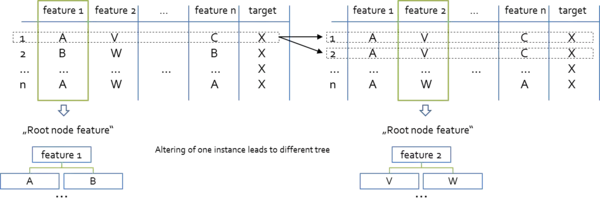

we randomize the fucking dataset. E.g pic above, it's named as "bootstrapping". 

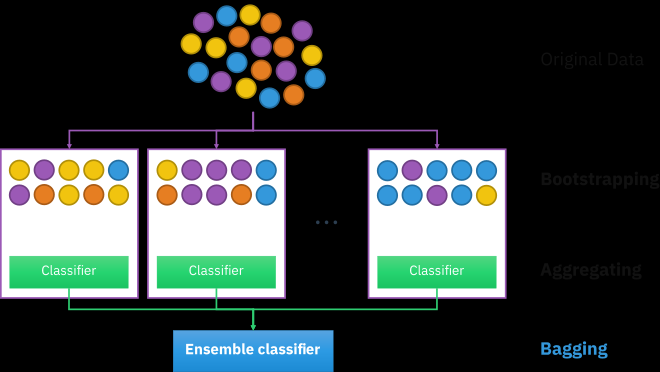

Here we create a multitude of datasets of the same length as the original dataset drawn from the original dataset with replacement (the *bootstrap* in bagging). We then train a tree model for each of the bootstrapped datasets and take the majority prediction of these models for a unseen query instance as our prediction (the *aggregation* in bagging).


Pic belows explain what actually aggregation is:
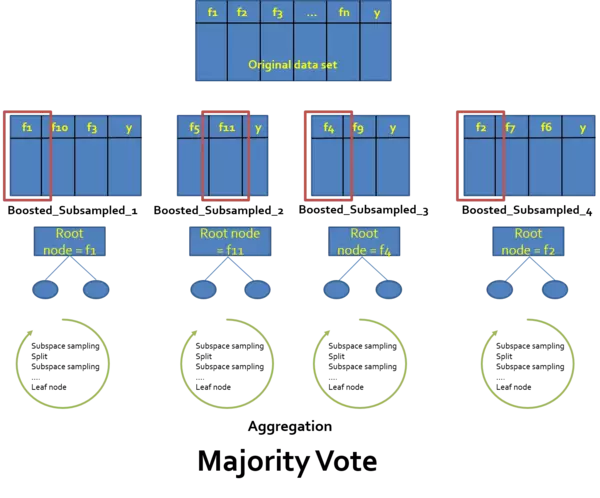

In [98]:
#Making a randomforest upon a random dataset, cuz why not?
    #classifier
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score         
import matplotlib.pyplot as plt
data, target=load_breast_cancer(return_X_y=True)
colnames=load_breast_cancer().feature_names; targetname=load_breast_cancer().target_names

train_data, test_data, train_target, test_target= train_test_split(data, target, random_state=23342, train_size=0.8)

'''
#getting the best N
fig, ax=plt.subplots()
N=1000
score=[]
for i in range(1, N, 10):
    model=RandomForestClassifier( n_estimators=i, random_state=243534)
    model.fit(train_data, train_target)
    predicted=model.predict(test_data)
    score.append(accuracy_score(predicted, test_target))
    
ax.plot([i for i in range(1,N, 10)],score, alpha=0.8, color="red", label="Score")
ax.set_xlabel("n_estimator")
ax.set_ylabel("score")
plt.show()
'''
#ye, 20 seems like the ideal size
model=RandomForestClassifier( n_estimators=20, random_state=243534)
model.fit(train_data, train_target)
predicted=model.predict(test_data)
print(accuracy_score(test_target, predicted))
#this offers a better accuracy score than the decisiontree classifier i made before


0.9824561403508771


     buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   ob

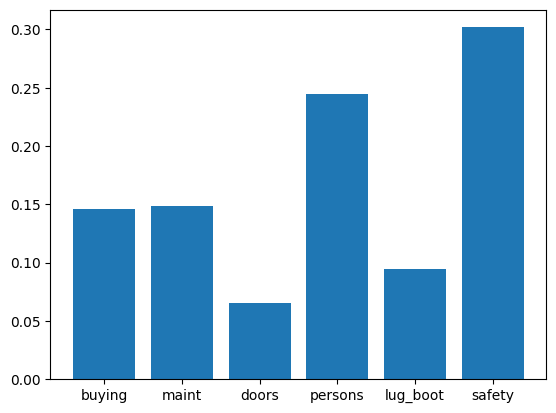

In [51]:
#testing car reevaluation cuz why not?
#classifier
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


#importing data
dummy=pd.read_csv("Files/Car/car.data", header=None)
dummy.columns=["buying","maint", "doors", "persons", "lug_boot", "safety", "class"]

#exploring
dummy.info()
dummy.isnull().sum()

#df -> np.array
data=dummy.iloc[:,:-1].values
target=dummy.iloc[:,-1].values

#encoding categorical data -> int
encoder=ce.OrdinalEncoder()    #same  thing as label encoder but easier cuz fuck you
encoder.fit(data)
data=encoder.transform(data)

#train test split
train_data, test_data, train_target, test_target=train_test_split(data, target, random_state=32124)

#model of randomforest classifier
    #getting the best n_estimator
'''
score=[];N=1000
for i in range(1, N, 10):
    model=RandomForestClassifier(random_state=239473, n_estimators=i)
    model.fit(train_data, train_target)
    predicted=model.predict(test_data)
    score.append(accuracy_score(test_target, predicted))
fig, ax= plt.subplots()
ax.plot([i for i in range(1,N,10)], score, color="red", alpha=0.8)
ax.set_ylabel("score"); ax.set_xlabel("n_estimator");ax.set_title("Finding the best score")
plt.show()
'''
model=RandomForestClassifier(random_state=239473, n_estimators=1000)
model.fit(train_data, train_target)
predicted=model.predict(test_data)
print(accuracy_score(test_target, predicted))

#exploring the model
    #which feature is the most influental?
fig, ax=plt.subplots()
ax.bar(["buying","maint", "doors", "persons", "lug_boot", "safety"], model.feature_importances_)
plt.show()

In [95]:
#trynna predict smth
def predictcar(urdata):
    urdata=encoder.transform(urdata)
    print(model.predict(urdata))


test=[["low", "med", "2", "2", "med", "med"]]
predictcar(test)

['unacc']


0.9118615087176193


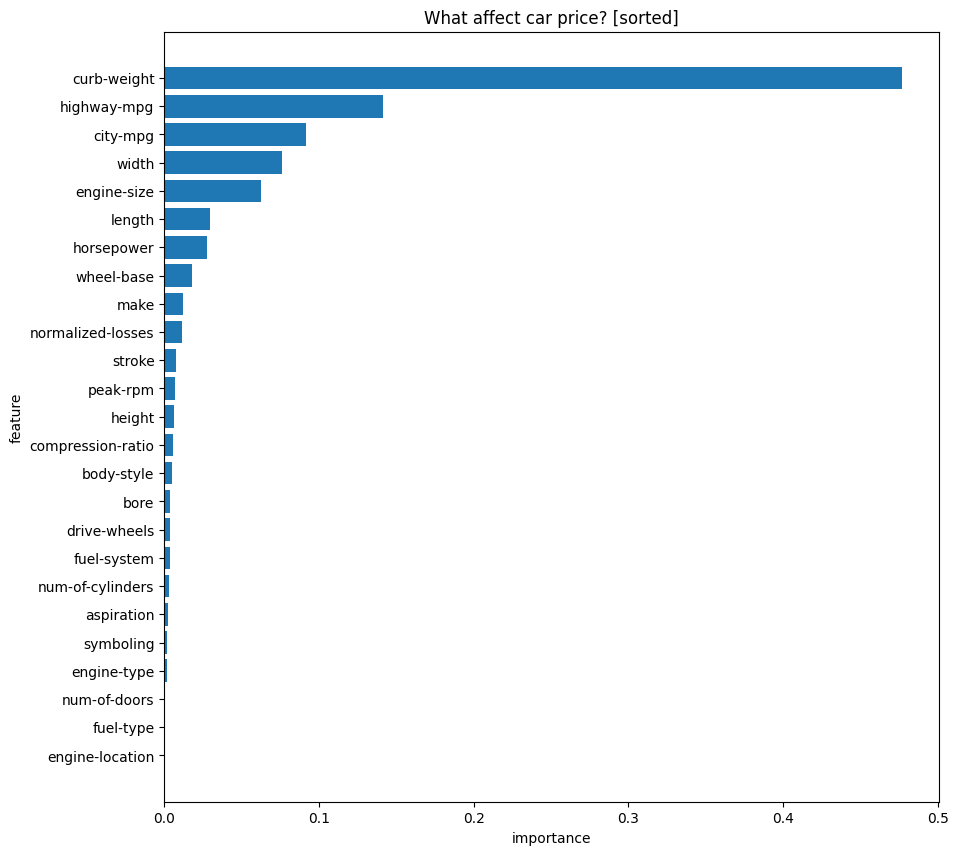

In [50]:

#Regression test
#library
import pandas as pd
import category_encoders as ce
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

#get data
dummy=pd.read_csv("Files/AutoMobile/imports-85.data", header=None)
columnnames=["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
dummy.columns=columnnames
    #exploring data
#drop "? aka Na"
getpos=dummy[dummy!="?"]
dummy=getpos.dropna()
#print(dummy.dtypes)

#pd -> np.array, target regression-> price
data=dummy.iloc[:,:-1]
target=dummy.iloc[:,-1].values

notcontinouscoltype=["make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "engine-type", "num-of-cylinders", "fuel-system"]
#encode
encoder=ce.OrdinalEncoder(cols=notcontinouscoltype)
encoder.fit(data)
data=encoder.transform(data)

#train test split
train_data, test_data, train_target, test_target= train_test_split(data, target, random_state=248274, train_size=0.8)
#model of randomforest
#finding the best n_estimator
'''
score=[];N=1000
for i in range(1,N,10):
    model=RandomForestRegressor(random_state=2324323, n_estimators=i)
    model.fit(train_data, train_target)
    predicted= model.predict(test_data)
    score.append(r2_score(test_target, predicted))
fig, ax = plt.subplots()
ax.plot([i for i in range(1,N,10)], score, color="red", alpha=0.8)
ax.set_yticks(np.linspace(50,100,50))
ax.set_title("Finding the best score");ax.set_xlabel("N_estimator");ax.set_ylabel("r2_score")
plt.show()
'''
#we gonna use 620
model=RandomForestRegressor(random_state=2324323, n_estimators=620)
model.fit(train_data, train_target)
predicted= model.predict(test_data)
print(r2_score(test_target, predicted))
fig, ax=plt.subplots(figsize=(10,10))

merged=list(zip(model.feature_names_in_, model.feature_importances_))
merged.sort(key=lambda x:x[1])
feature_names,importances=list(zip(*merged))
ax.barh(feature_names , importances)
ax.set_title("What affect car price? [sorted]"); ax.set_xlabel("importance"); ax.set_ylabel("feature")
plt.show()

In [49]:
 #predictin price of a cat
def carpredict(urdatamate):
    temp=pd.DataFrame(urdatamate, columns=columnnames[:-1])
    urdatamate=encoder.transform(temp)
    print(model.predict(urdatamate))
    
carpredict([[3, '153', 'mitsubishi', 'gas', 'turbo', 'two', 'hatchback', 'fwd', 'front', 96.3, 173.0, 65.4, 49.4, 2370, 'ohc', 'four',
           110, 'spdi', '3.17', '3.46', 7.5, '116', '5500', 23, 30]])

[10022.78870968]
